# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `32`
* Students: `George Adaimi, Okan Altingovde, Isinsu Katircioglu, Sena Kiciroglu`
* Dataset: `FMA`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import squareform 

Number of nodes:  2000
Number of edges:  32646


Text(0.5, 1.05, 'Our graph')

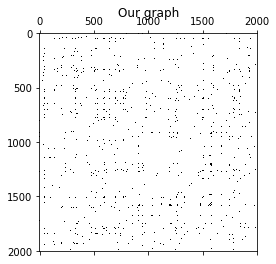

In [2]:
adjacency =  np.load('adjacency.npy')# the adjacency matrix
n_nodes =  adjacency.shape[0]# the number of nodes in the network
n_edges =  np.count_nonzero(adjacency)//2# the number of edges in the network
print('Number of nodes: ', n_nodes)
print('Number of edges: ', n_edges)

adjacency_bin = np.zeros(adjacency.shape)
adjacency_bin[adjacency > 0] = 1

plt.spy(adjacency_bin)
plt.title('Our graph')

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if seed is not None:
        np.random.seed(seed)
    flipped_coin = np.random.binomial(1, p, (n*(n-1)//2))
    adjacency = squareform(flipped_coin)
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

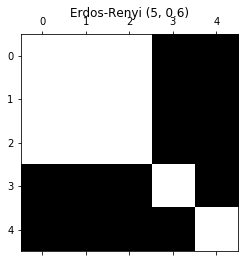

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

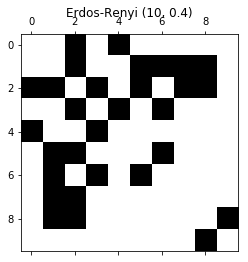

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

33118.0


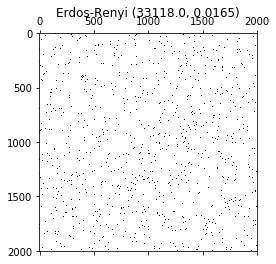

In [6]:
erdos_renyi_graph = erdos_renyi(n_nodes, 0.0165, 41)
n_edges_erdos_renyi = np.sum(erdos_renyi_graph)/2
plt.spy(erdos_renyi_graph)
plt.title('Erdos-Renyi (' + str(n_edges_erdos_renyi)+ ', 0.0165)')
print(n_edges_erdos_renyi)

**Our answer:**

We had to choose a very low probability (0.0165) for the Erdos-Renyi graph to have a graph as sparse as our own graph. We chose this number by trial and error. 

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [7]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    if seed is not None:
        np.random.seed(seed)
    adjacency = np.zeros((n,n))
    
    #initial graph with m0 nodes. 
    initial_connection_list = np.zeros((m0*(m0-1)//2,))
    while(not np.all(np.sum(adjacency[:m0,:m0], 0))): #make sure each node has at least one link
        #create random edge between 2 nodes
        new_connection_ind = np.random.randint(0, high=(m0*(m0-1)//2), size=1) 
        if initial_connection_list[new_connection_ind] != 1: 
            initial_connection_list[new_connection_ind]= 1 
            #update adjacency matrix
            adjacency[:m0,:m0] = squareform(initial_connection_list)

    for new_node_ind in range(m0,n):
        connected_count = 0 #in the beginning the node is unconnected
        sum_of_degree = np.sum(np.sum(adjacency[:new_node_ind, :new_node_ind], axis=0))
        
        while (connected_count < m): #until i connect new nodes to m nodes, draw a new node and try to connect
            random_node_ind = np.random.randint(0, high=new_node_ind, size=1) #draw a random existing node
            if (adjacency[new_node_ind, random_node_ind] != 1): #if node is not already connected
                #find degree of this new node
                node_degree = np.sum(adjacency[random_node_ind, :new_node_ind])
                #find sum of degree of all nodes
                p = node_degree/sum_of_degree
                p_drawn = np.random.rand(1,1)
                if p_drawn < p: #connect node
                    adjacency[random_node_ind, new_node_ind] =1
                    adjacency[new_node_ind, random_node_ind] =1
                    connected_count += 1
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

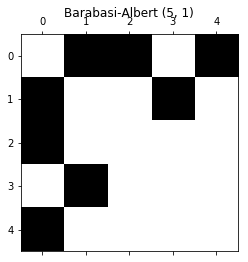

In [8]:
ba = barabasi_albert(5, 1, 2, 9087)

plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

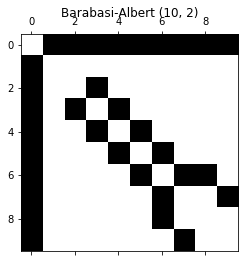

In [9]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

33689.0


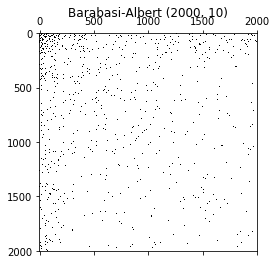

In [10]:
barabasi_albert_graph = barabasi_albert(2000, 17, 20, 41)
plt.spy(barabasi_albert_graph)
plt.title('Barabasi-Albert (2000, 10)')
n_edges_barabasi_albert = np.sum(barabasi_albert_graph)/2
print(n_edges_barabasi_albert)

**Your answer here**
We start with around 20 initial nodes. We expect that this initial network to have few edges (negligable compared to our edge count). Therefore the only way the BA graph can have 32646 edges is for each new edge (there will be 1980 of them) to make 32600/1980 ~= 17 new connections. 

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [11]:
# Your code here.
n_edges_ours =  np.count_nonzero(adjacency)//2# the number of edges in the network
n_edges_erdos_renyi = np.sum(erdos_renyi_graph)/2
n_edges_barabasi_albert = np.sum(barabasi_albert_graph)/2

print("Our edges:", n_edges_ours)
print("Erdos renyi Edges:", n_edges_erdos_renyi)
print("Barabasi-Albert Edges:", n_edges_barabasi_albert)

print("They are all similar!")

Our edges: 32646
Erdos renyi Edges: 33118.0
Barabasi-Albert Edges: 33689.0
They are all similar!


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [12]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    # Your code here.
    kl= -np.sum(np.multiply(p,np.log(q/p)))    
    return kl

def get_KLDivergence(X):
    epsilon = np.min(np.min(X))
    epsilon = 0 if epsilon >0 else -epsilon+1 ##make sure all values are positive
    distmat = []
    ## Iterate to get the JS divergence between each sample ###
    ## Will get an upper triangle of the matrix and then just straighten it###
    for i,sample1 in enumerate(X.values[:-1]):
        for j,sample2 in enumerate(X.values[(i+1):]):
            distmat.append((scipy.stats.entropy(sample1+epsilon, sample2+epsilon) + scipy.stats.entropy(sample2+epsilon, sample1+epsilon))/2)
    return np.array(distmat)


In [13]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
print(kl_divergence(p_test, q_test))

0.0915162218494358


### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [14]:
def has_disconnected_nodes(adjacency):
    return not np.all(np.sum(adjacency, axis=0))

def remove_disconnected_nodes(adjacency):
    disconnected_nodes_ind = np.where((np.sum(adjacency, axis=0) == 0))
    temp = np.delete(adjacency, disconnected_nodes_ind, axis = 0)
    output = np.delete(temp, disconnected_nodes_ind, axis = 1)
    return output


In [15]:
#Does our graph have disconnected nodes?
print("Our graph has disconnected nodes:", has_disconnected_nodes(adjacency_bin))
#We will remove these disconnected nodes.
our_graph = remove_disconnected_nodes(adjacency_bin)
n_nodes = our_graph.shape[0]
print("Removed disconnected nodes. Our graph now has", n_nodes, "nodes")

Our graph has disconnected nodes: True
Removed disconnected nodes. Our graph now has 1799 nodes


In [16]:
#genereate new ER and BA graphs with same number of nodes
er_graph = erdos_renyi(n_nodes, 0.02, 41)

In [17]:
ba_graph = barabasi_albert(n_nodes, 17, 20, 41)

In [18]:
print("Edge count: ours:", np.sum(our_graph)//2, "er:", np.sum(er_graph)//2, "ba:", np.sum(ba_graph)//2)

Edge count: ours: 32646.0 er: 32322 ba: 30272.0


In [19]:
#Find degree distributions
degree_sum_ours = np.sum(our_graph)
degree_dist_ours = np.sort(np.sum(our_graph, axis=0)/degree_sum_ours)

degree_sum_er = np.sum(er_graph)
degree_dist_er = np.sort(np.sum(er_graph, axis=0)/degree_sum_er)

degree_sum_ba = np.sum(ba_graph)
degree_dist_ba = np.sort(np.sum(ba_graph, axis=0 )/degree_sum_ba)

#find the KL divergences
print("KL Divergence between ours and ER:", kl_divergence(degree_dist_ours, degree_dist_er))
print("KL Divergence between ours and BA:", kl_divergence(degree_dist_ours, degree_dist_ba))

KL Divergence between ours and ER: 0.3124131448112719
KL Divergence between ours and BA: 0.12130305411164323


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

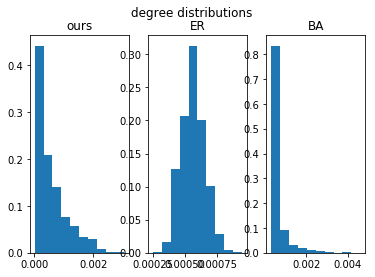

In [20]:
# Your code here.
weights_ours = np.ones_like(degree_dist_ours) / float(n_nodes)
weights_er = np.ones_like(degree_dist_er) / float(n_nodes)
weights_ba = np.ones_like(degree_dist_ba) / float(n_nodes)

fig = plt.figure()
plt.suptitle("degree distributions")
plt.subplot(131)
plt.hist(degree_dist_ours, weights=weights_ours)
plt.title("ours")
plt.subplot(132)
plt.hist(degree_dist_er, weights=weights_er)
plt.title("ER")
plt.subplot(133)
plt.hist(degree_dist_ba, weights=weights_ba)
plt.title("BA")
plt.show()
plt.close(fig)

**Our answer:**
Judging by the degree distributions, our network is closer to a Barabasi-Albert network than Erdos-Renyi. 
We expect the KL divergence to be **higher** between our graph and the ER graph, and **lower** between our graph and BA graph and we can observe this (KL divergence between ours and ER: 0.3124, between ours and BA: 0.1213)

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**
Equal degree distributions do not mean that the graphs are the same. Degree distributions show, from highest to lowest, the degree of each node. If we have two equal degree distributions, this does not mean that the nodes have to be connected in the same way. We show an example below to reinforce our point.

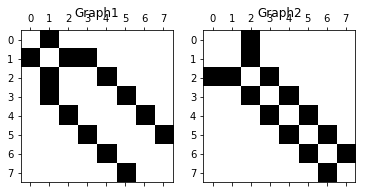

They are different graphs!

Degree distribution of graph 1: [0.07142857 0.07142857 0.07142857 0.14285714 0.14285714 0.14285714
 0.14285714 0.21428571]
Degree distribution of graph 2: [0.07142857 0.07142857 0.07142857 0.14285714 0.14285714 0.14285714
 0.14285714 0.21428571]
They have the same degree distribution!


In [21]:
#Form two graphs
graph1 = np.zeros([8,8])
graph1[0,1]=graph1[1,0]=1
graph1[1,2]=graph1[2,1]=1
graph1[1,3]=graph1[3,1]=1
graph1[2,4]=graph1[4,2]=1
graph1[3,5]=graph1[5,3]=1
graph1[4,6]=graph1[6,4]=1
graph1[5,7]=graph1[7,5]=1
graph2 = np.zeros([8,8])
graph2[0,2]=graph2[2,0]=1
graph2[1,2]=graph2[2,1]=1
graph2[2,3]=graph2[3,2]=1
graph2[3,4]=graph2[4,3]=1
graph2[4,5]=graph2[5,4]=1
graph2[5,6]=graph2[6,5]=1
graph2[6,7]=graph2[7,6]=1

#Plot them
fig = plt.figure()
plt.subplot(121)
plt.spy(graph1)
plt.title('Graph1')
plt.subplot(122)
plt.spy(graph2)
plt.title('Graph2')
plt.show()
plt.close(fig)
print("They are different graphs!\n")

degree_g1 = np.sum(graph1)
degree_dist_g1 = np.sort(np.sum(graph1, axis=0)/degree_g1)
degree_g2 = np.sum(graph2)
degree_dist_g2 = np.sort(np.sum(graph2, axis=0)/degree_g2)
print("Degree distribution of graph 1:", degree_dist_g1)
print("Degree distribution of graph 2:", degree_dist_g2)
print("They have the same degree distribution!")

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [22]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Our answer:**
We choose a **Power-Law Cluster** network. Our reasons are the following:
* We found that the degree distribution of our graph resembles a power-law degree distribution (albeit with a very high gamma value). Therefore, we wanted to generate a graph with a power-law degree distribution. 
* We compared the histogram of our degree distribution to those of Erdos-Renyi and Watts-Strogatz, and found that they look very different from ours. Therefore we did not want to choose these distributions.
* When we check the size of the largest connected component, we find that it is 1769. Considering the fact that our graph is made up of 2000 nodes, we can say that we have a giant component in our graph. The power-law cluster algorithm implemented by the NetworkX library also leads to a giant component forming, because every new node that is added is more likely to attach to a node with a higher degree (preferential attachment), similar to Barabasi-Albert.
* Our model has a high clustering coefficent. The power-law cluster network is also likely to have a higher clustering coefficent than similar algorithms such as Barabasi-Albert. This is because, in this algorithm, after the preferential attachment step, the new node also has a chance of making an edge to the neighbors of the node it has attached to (forming a triangle). 

### Question 11

Explain (in short) how the chosen model works.

**Our answer:**
The power-law cluster network model incorperates the ideas of growth and preferential attachment. It also leads to high clustering coefficents. It is formed in the following way:
1. We start with an initial number of connected nodes (m_0).
2. We add a new node to the graph. 
3. We randomly choose an existing node in the graph. The probability of making a new link between the new node and this existing node is determined by the existing node's degree divided by the sum of all degrees in the graph. This is called the preferential attachment step.
4. If we have made the link in the preferential attachment step, we also consider a triad formation step with probably p.  We decide whether to make another connection between the new node and a neighbor of the node it has attached to. 
4. We repeat steps 3-4 (preferential attachment and triad formation) until the new node has m links.
5. We keep adding nodes according to steps 2-3-4 until we have the number of nodes we need.

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [23]:
our_graph_nx= nx.from_numpy_matrix(our_graph)
print("Number of edges is: ours:", our_graph_nx.number_of_edges())

#We form 
n_nodes = nx.number_of_nodes(our_graph_nx)
pl_graph_nx = nx.powerlaw_cluster_graph(n=n_nodes, m=18, p=0.8, seed=41)
print("Number of edges for power-law graph:", pl_graph_nx.number_of_edges())

Number of edges is: ours: 32646
Number of edges for power-law graph: 31947


### Question 13

Check the properties you expected to be similar, and compare to your network.

Number of connected components: ours: 15 pl: 1
Size of largest connected component: ours: 1769 pl: 1799
Average degree is: ours: 36.2934963868816 pl: 35.51639799888827
Std of degree is: ours: 35.5476571335769 pl: 33.648257933451845


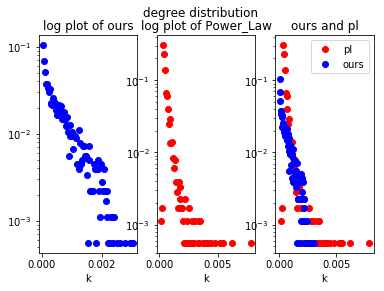

KL divergence between the two graphs is: 0.1336052653350235
Average clustering coefficent: ours: 0.4405204394667885 pl: 0.13553981799410597
Average shortest path length: ours: 3.5815509184062373 pl: 2.366206414266732


In [24]:
our_connected_comp_list = list(nx.connected_component_subgraphs(our_graph_nx))
pl_connected_comp_list = list(nx.connected_component_subgraphs(pl_graph_nx))
print("Number of connected components: ours:", nx.number_connected_components(our_graph_nx), "pl:",  nx.number_connected_components(pl_graph_nx))
print("Size of largest connected component: ours:", nx.number_of_nodes(our_connected_comp_list[0]), "pl:", nx.number_of_nodes(pl_connected_comp_list[0]))

degree_sequence_pl = np.array(sorted([d for n, d in pl_graph_nx.degree()], reverse=False))  # degree sequence
normalized_degree_sequence_pl = degree_sequence_pl/np.sum(degree_sequence_pl)
degree_sequence_ours = np.array(sorted([d for n, d in our_graph_nx.degree()], reverse=False))  # degree sequence
normalized_degree_sequence_ours = degree_sequence_ours/np.sum(degree_sequence_ours)

print("Average degree is: ours:", np.mean(degree_sequence_ours), "pl:", np.mean(degree_sequence_pl))
print("Std of degree is: ours:", np.std(degree_sequence_ours), "pl:", np.std(degree_sequence_pl))

fig = plt.figure()
weights = np.ones_like(normalized_degree_sequence_ours) / float(n_nodes)
n, bins, patches = plt.hist(normalized_degree_sequence_ours, weights=weights, bins = 100)
y_ax = bins[1:]
weights_pl = np.ones_like(normalized_degree_sequence_pl) / float(n_nodes)
n_pl, bins, patches = plt.hist(normalized_degree_sequence_pl, weights=weights_pl, bins = 100)
y_ax_pl = bins[1:]
plt.close(fig)

fig = plt.figure()
plt.suptitle("degree distribution")
plt.subplot(131)
plt.title("log plot of ours")
plt.semilogy(y_ax, n,  "bo")
plt.xlabel("k")
plt.subplot(132)
plt.title("log plot of Power_Law")
plt.semilogy(y_ax_pl, n_pl,  "ro")
plt.xlabel("k")
plt.subplot(133)
plt.title("ours and pl")
plt.semilogy(y_ax_pl, n_pl,  "ro", label='pl')
plt.semilogy(y_ax, n,  "bo", label='ours')
plt.legend()
plt.xlabel("k")
plt.show()
plt.close(fig)

print("KL divergence between the two graphs is:", kl_divergence(normalized_degree_sequence_ours, normalized_degree_sequence_pl))
print("Average clustering coefficent: ours:", nx.average_clustering(our_graph_nx), "pl:",  nx.average_clustering(pl_graph_nx))
print("Average shortest path length: ours:", nx.average_shortest_path_length(our_connected_comp_list[0]), "pl:", nx.average_shortest_path_length(pl_graph_nx))

Are the results what you expected? Explain.

**Our answer:**
* The number of edges is very similar, since we purposely set the power-law cluster graph (denoted from now on as PL) to have a similar number of edges. Each new node added to the PL graph must make 18 new connections for the number of edges to be similar.
* The size of the largest connected component is very similar (we have a few nodes that are still not connected to the giant component, whereas the PL graph is in its connected stage. This was expected.
* We predicted that our degree distributions would be similar. The degree distribution itself looks similar and the KL divergence between them is low, except there are some differences. Our average degree turned out to be almost the same, however the std of our degree distribution is much higher.
* The average clustering coefficent of our graph is much higher than the PL graph. This shows that our graph is more clustered than the PL graph (even though we specifically chose the PL graph model to have a high clustering coefficent, it was still not as high as our graph's). 
* The average shortest path length of our graph is larger than the PL graph's. The PL graph is closer to a small-world graph than our network.